## Proyecto: Módulo II. TE y MD

**Estadística Inferencial**

- Profesora: Claudia Cristina Reyes Montes de Oca

- Alumno: Mosqueda Becerra Gabriel

- Número de cuenta: 318286897


# Creación de Ambiente

In [108]:
import numpy as np

from scipy.stats import norm, binom, chi2, expon
import sympy # Para el calculo simbólico y algebraico
from sympy.abc import x # importa la variable simbólica x
import scipy.stats as st

# graficos
import matplotlib.pyplot as plt
import seaborn as sns


from scipy import stats # para los intervalos de confianza




# Estimadores y sus propiedades


**Definiciones**

## Estimador

Un **estimador** es una función de la muestra que se utiliza para aproximar un parámetro poblacional desconocido.

Si tenemos una muestra aleatoria $X_1, X_2, \dots, X_n$ de una población con parámetro ${\theta}$. un estimador de ${\theta}$ se denota como:

$$
\hat{\theta} = g(X_1, X_2, \dots, X_n)
$$


### Métodos comunes para obtener estimadores:

1. **Método de momentos (MM)**:  
   Se igualan los momentos muestrales con los momentos poblacionales. Por ejemplo, para la media poblacional $\\mu\$:

   $$
   \hat{\mu}_{MM} = \frac{1}{n} \sum_{i=1}^{n} X_i
   $$

2. **Máxima verosimilitud (EMV o MLE)**:  
   Se busca el valor de $\\theta\$ que **maximiza la función de verosimilitud**:

   $$
   L(\theta; X_1, \dots, X_n) = \prod_{i=1}^{n} f(X_i;\theta)
   $$


## Insesgadez

Un estimador $\\hat{\theta}\$ es **insesgado** si:

$$
\mathbb{E}[\hat{\theta}] = \theta
$$

Ejemplo: la media muestral $\bar{X}$ es insesgada para $\{\mu\}$





## Consistencia

Un estimador $\\hat{\theta}_n\$ es **consistente** si, cuando aumenta el tamaño de la muestra $$\(n \to \infty\)$$

$$
\hat{\theta}_n \xrightarrow{p} \theta
$$

Esto significa que **con más datos, el estimador se acerca al verdadero parámetro**.


## Eficiencia

Entre dos estimadores insesgados $\hat{\theta}_1$ y  $\hat{\theta}_2$, se dice que $\hat{\theta}_1$ es **más eficiente** si tiene **menor varianza**:

$$
\text{Var}(\hat{\theta}_1) < \text{Var}(\hat{\theta}_2)
$$



Ejemplo

In [109]:
# Simulación de datos
np.random.seed(0)
data = np.random.normal(loc=5, scale=2, size=100)

# Estimador de la media por método de momentos
mu_mm = np.mean(data)
print("Estimador de la media (MM):", mu_mm)

# Estimador de la media y desviación por MLE (para normal coincide con MM)
mu_mle, sigma_mle = norm.fit(data)
print("Estimador de la media (MLE):", mu_mle)
print("Estimador de la desviación estándar (MLE):", sigma_mle)


Estimador de la media (MM): 5.11961603106897
Estimador de la media (MLE): 5.11961603106897
Estimador de la desviación estándar (MLE): 2.0157644894331592


Exploremos más estos estadísticos

# Estimador Máximo Verosímil

Ejemplo 1. Lanzamos una moneda 100 veces, sabiendo que se obtienen 55 soles. Encontrar el EMV para la probabilidad $p$ de obtener sol en un sólo lanzamiento.

Si $X$: el número de soles que se obtiene al lanzar una moneda, se tiene que $X\sim Bin(100,p)$, es decir

$$f(55 \text{soles};p) = \binom{100}{55}p^{55}(1-p)^{100-55}$$

In [110]:
# Vamos a definir a p como una variable simbólica positiva
p = sympy.symbols('p', positiva=True)
# Definimos f
f = p**55 * (1-p)**(100-55)
#Derivamos f con respecto a p
df = sympy.diff(f,p)
# Igualamos la derivada a cero y despejamos p
phat = sympy.solve(df,p)[1]
phat

#print(f'El estimador de máxima verosimilitud para p es: {phat}')
print("El estimador de máxima verosimilitud para p es", phat)

El estimador de máxima verosimilitud para p es 11/20


In [111]:
# Veamos otro ejemplo

# Simularemos una muestra de tamaño 100

r = binom.rvs(n=1, p=0.7, size=100)
r

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0])

In [112]:
f = p**x * (1-p)**(1-x)
J = np.prod([f.subs(x,i) for i in r]) # subs es de susbtituir la variable simbolica
logJ = sympy.expand_log(sympy.log(J))
phat = sympy.solve(sympy.diff(logJ,p),p)[0]
print("El estimador de máxima verosimilitud para p es", phat)
# Obtenemos un valor cercano a 0.7

El estimador de máxima verosimilitud para p es 18/25


**Ejercicio:** El tiempo de retardo para pacientes con enfermedad coronaria potencial se define como la duración entre el comienzo de un síntoma agudo cardiovascular y la llegada a la unidad de emergencia.

Se supone que el tiempo de retardo sigue una distribución exponencial con parámetro $\theta $.

Se registraron los tiempos de retardo (en minutos) en la clínica para los primeros 20 pacientes:

$$ 525, \ 719, \ 2880, \ 150, \ 30, \ 251, \ 45, \ 858, \ 15, \ 47, \ 90, \ 56, \ 68, \ 6, \ 189, \ 180, \ 60, \ 60, \ 294, \ 747 $$

- Encuentra un estimador por el **método de momentos** para la media de la distribución (exponencial).
  Rocordemos que si $X\sim Exp(\theta)$, entonces $\mathbb{E}[X]=\frac{1}{\theta}$
- (Python) Encuentra el valor del estimador con los datos dados.

Media muestral: 363.50 minutos
Estimador de θ (método de momentos): 0.00275 por minuto


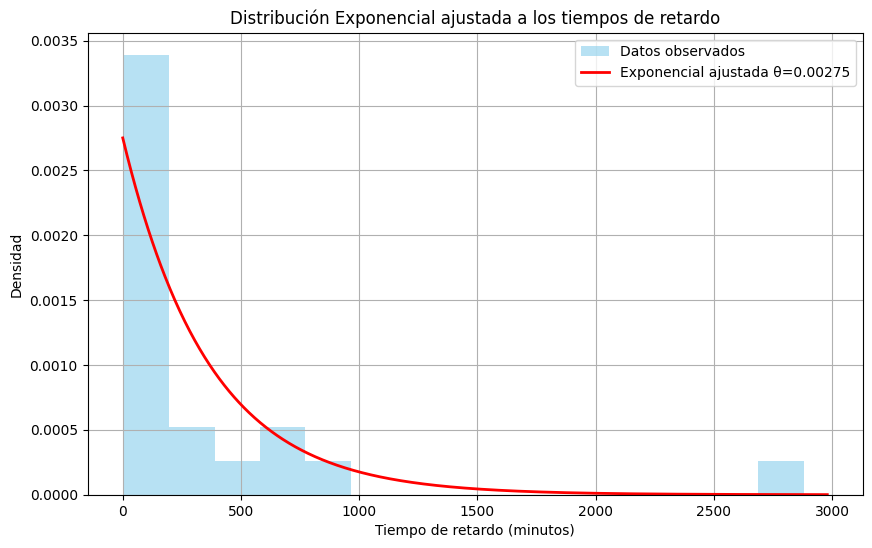

In [113]:
# solucion
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon


datos = np.array([525, 719, 2880, 150, 30, 251, 45, 858, 15, 47,
                  90, 56, 68, 6, 189, 180, 60, 60, 294, 747])

# Media muestral
media_muestral = np.mean(datos)
print(f"Media muestral: {media_muestral:.2f} minutos")

# Estimador de theta por método de momentos
theta_hat = 1 / media_muestral
print(f"Estimador de θ (método de momentos): {theta_hat:.5f} por minuto")

# Grafico
x = np.linspace(0, max(datos)+100, 1000)

# Función de densidad con theta_hat
pdf = theta_hat * np.exp(-theta_hat * x)

# Graficar
plt.figure(figsize=(10,6))
plt.hist(datos, bins=15, density=True, alpha=0.6, color='skyblue', label='Datos observados')
plt.plot(x, pdf, 'r-', lw=2, label=f'Exponencial ajustada θ={theta_hat:.5f}')
plt.title("Distribución Exponencial ajustada a los tiempos de retardo")
plt.xlabel("Tiempo de retardo (minutos)")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()


**Ejercicio (Pyton)**. Suponga que la vida util de los focos de cierta marca, se modela mediante una distribución expoencial de parametro  θ  (desconocido). Probamos 5 focos y encontramos que tienen una vida útil de  2,3,1,3  y  5  años, respectivamente. ¿Cuál es el MLE para  θ ?

Estimador de máxima verosimilitud (MLE) de θ: 0.35714 por año
MLE de θ usando scipy.stats: 0.35714 por año


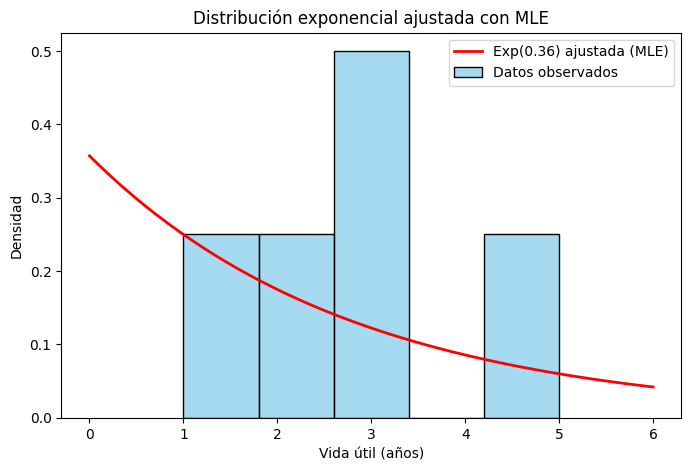

In [114]:
# solucion

datos = np.array([2, 3, 1, 3, 5])  # vida útil de los focos en años

# MLE para theta
# Para X ~ Exp(theta), la función de verosimilitud es:
# L(theta) = prod(theta * exp(-theta*x_i)) => log(L) = n*log(theta) - theta*sum(x_i)
# Derivando y igualando a cero, MLE: theta_hat = n / sum(x_i)

n = len(datos)
theta_mle = n / np.sum(datos)
print(f"Estimador de máxima verosimilitud (MLE) de θ: {theta_mle:.5f} por año")


# En scipy, la función expon.fit devuelve loc y scale; para Exp(theta), scale = 1/theta
loc, scale = expon.fit(datos, floc=0)  # fijamos loc=0
theta_mle_scipy = 1 / scale
print(f"MLE de θ usando scipy.stats: {theta_mle_scipy:.5f} por año")


# grafico
x = np.linspace(0, max(datos)+1, 200)

# Función de densidad de la exponencial con el MLE
fitted_pdf = theta_mle * np.exp(-theta_mle * x)

# Graficar
plt.figure(figsize=(8,5))
sns.histplot(datos, bins=5, stat='density', color='skyblue', edgecolor='black', label='Datos observados')
plt.plot(x, fitted_pdf, 'r-', lw=2, label=f'Exp({theta_mle:.2f}) ajustada (MLE)')
plt.xlabel("Vida útil (años)")
plt.ylabel("Densidad")
plt.title("Distribución exponencial ajustada con MLE")
plt.legend()
plt.show()


# Estimador de Momentos

### Método de Momentos (MM)

### Definición
El **método de momentos** es un procedimiento para estimar los parámetros desconocidos de una distribución de probabilidad, usando los **momentos de la muestra**.  

Si una variable aleatoria \(X\) depende de un parámetro $\\theta\$, se definen los momentos poblacionales:

$$
\mu_k = \mathbb{E}[X^k], \quad k=1,2,\dots
$$

El método de momentos consiste en **igualar los momentos muestrales con los momentos poblacionales** para obtener estimadores de $\\theta\$:

$$
\hat{\theta}_{MM} \text{ se obtiene resolviendo } \frac{1}{n}\sum_{i=1}^n X_i^k = \mu_k(\theta), \quad k=1,2,\dots
$$

---

### Propiedades
1. **Simplicidad:** Solo requiere cálculo de momentos.  
2. **Consistencia:** En general, los estimadores por MM son consistentes.  
3. **No siempre eficiente:** A diferencia del MLE, puede no ser insesgado ni eficiente.

---




### Ejemplo 1: Exponencial
Si $X \sim \text{Exp}(\theta)\$, se tiene que:

$$
\mathbb{E}[X] = \frac{1}{\theta}
$$

El momento muestral de primer orden es:

$$
\bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i
$$

Igualando:

$$
\bar{X} = \frac{1}{\theta} \implies \hat{\theta}_{MM} = \frac{1}{\bar{X}}
$$

In [115]:
datos = np.array([2, 3, 1, 3, 5])

# Método de momentos para exponencial
theta_mm = 1 / np.mean(datos)
theta_mm


np.float64(0.35714285714285715)

## Ejemplo 2: Binomial

Sea $X \sim \text{Bin}(n,p)\$, donde \(n\) es conocido y \(p\) es el parámetro desconocido.  

El primer momento poblacional es:

$$
\mathbb{E}[X] = n p
$$

Igualando con el momento muestral:

$$
\bar{X} = \frac{1}{m} \sum_{i=1}^{m} X_i
$$

Se obtiene el estimador por método de momentos:

$$
\hat{p}_{MM} = \frac{\bar{X}}{n}
$$



In [116]:
# Datos de ejemplo: número de éxitos en 10 ensayos
datos_binom = np.array([3, 5, 4, 6, 2])
n = 10

# Estimador por método de momentos
p_mm = np.mean(datos_binom) / n
p_mm


np.float64(0.4)


### Ejemplo 3: Normal

Sea $X \sim N(\mu, \sigma^2)\$ con ambos parámetros desconocidos.

**Teoría:**

- Primer momento poblacional:  
$$
\mathbb{E}[X] = \mu \implies \hat{\mu}_{MM} = \bar{X}
$$

- Segundo momento poblacional:  
$$
\mathbb{E}[X^2] = \sigma^2 + \mu^2 \implies \hat{\sigma}^2_{MM} = \frac{1}{n}\sum_{i=1}^{n} X_i^2 - \bar{X}^2
$$


In [117]:
datos_norm = np.array([4.2, 5.1, 3.8, 4.5, 5.0])

# Estimador de la media por método de momentos
mu_mm = np.mean(datos_norm)

# Estimador de la varianza por método de momentos
sigma2_mm = np.mean(datos_norm**2) - mu_mm**2

mu_mm, sigma2_mm


(np.float64(4.5200000000000005), np.float64(0.23759999999999337))

# Intervalos de confianza

## Intervalo de Confianza para la media de una distribución normal (σ conocida)

Sea $X_1, \dots, X_n$ una m.a. $X_i \sim \mathcal{N}(\mu, \sigma^2)$. Entonces:

- $\bar{X} \sim \mathcal{N}(\mu, \frac{\sigma^2}{n})$
- $Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \sim \mathcal{N}(0,1)$

### Nivel de significancia (error): $\alpha$

El intervalo de confianza se basa en que:
$$
\mathbb{P}\left( -z_{\alpha/2} < \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} < z_{\alpha/2} \right)
= \mathbb{P}\left( \bar{X} - z_{\alpha/2} \frac{\sigma}{\sqrt{n}} < \mu < \bar{X} + z_{\alpha/2} \frac{\sigma}{\sqrt{n}} \right)
= 1 - \alpha
$$

### El intervalo del $(1 - \alpha) \cdot 100\%$ de confianza para $\mu$ (con $\sigma$ conocida) es:

$$
\left( \bar{X} - z_{\alpha/2} \frac{\sigma}{\sqrt{n}}, \quad \bar{X} + z_{\alpha/2} \frac{\sigma}{\sqrt{n}} \right)
$$
donde
- $\sigma$ es la desviación estándar
- $\frac{\sigma}{\sqrt{n}}$ es el error estándar de la media
- $z_{\alpha/2}$ determina el nivel de confianza
- el intervalo está centrado en $\bar{X}$

**OBS** A mayor valor de $n$ -> menor error estándar -> el intervalo de confianza es más pequeño -> lo cual hace que se acerque más a la media, es decir, que haya menos variación.

**EJEMPLO 1** Para trata de estimar la media de consumo por cliente en un restaurante, se reunieron datos de una muestra de $49$ clientes durante tres semanas.

**a)** Supongamos que la **desviación estándar** de la población es de $\$2.5$. ¿Cuál es el error estándar de la media?

**b)** Con un nivel de confianza del $95\%$, ¿cuál es el margen de error?

**c)** Si la media de la muestra es de $\$22.60$ ¿cuál es el intervalo de confianza del $95\%$ para la media de la población?

In [118]:
# Datos:
n = 49
sigma = 2.5
media_muestral = 22.60
confianza = 0.95

# a) Error estándar de la media
error_estandar = sigma / np.sqrt(n)
print(f"Eror estándar de la media: {error_estandar:.2f}")

# b) Margen de error
# 1-confianza= 0.05 => 0.025 en cada cola -> (1-confianza)/2

z = st.norm.ppf(1 - (1 - confianza) / 2) # ppf -> percentil point function
# z_{0.975} es tal que P(Z <= z_{0.975}) = 0.975
margen_error = z * error_estandar
print(f"Margen de error: {margen_error:.2f}")

# c) Intervalo de confianza
limite_inferior = media_muestral - margen_error
limite_superior = media_muestral + margen_error
print(f"Intervalo de confianza del {confianza*100}%: ({limite_inferior:.2f}, {limite_superior:.2f})")

Eror estándar de la media: 0.36
Margen de error: 0.70
Intervalo de confianza del 95.0%: (21.90, 23.30)


Por lo tanto, podemos decir que con un $95\%$ de confianza, se estima que el **consumo medio poblacional** está entre $\$21.90$ y $\$23.30$

**Ejemplo 2** Supongamos que se toma una muestra aleatoria de 100 personas para estimar la media del peso de una población, y se obtiene que la media muestral es de $70$ kg con una desviación estándar que es conocida de $10$ kg. Para un nivel de confianza del $95\%$, calcular el intervalo de confianza.

In [119]:
# Datos:
n = 100
sigma = 10
media_muestral = 70
confianza = 0.95
error_estandar = sigma / np.sqrt(n)

# Vamos a utilizar la función scipy.stats.norm.interval
# Sintaxis: scipy.stats.norm.interval(confidence = confianza, loc=media_muestral, scale=error_estandar)

intervalo = st.norm.interval(confianza, loc=media_muestral, scale=error_estandar)

print(f"Intervalo de confianza del {confianza*100}%: ({intervalo[0]:.2f}, {intervalo[1]:.2f})")

Intervalo de confianza del 95.0%: (68.04, 71.96)


## Intervalo de Confianza para la media $\mu$ de una distribución normal ($\sigma$ deconocida)

Sea $X_1, \dots, X_n$ una m.a. $X_i \sim \mathcal{N}(\mu, \sigma^2)$. Entonces:

- $\bar{X} \sim \mathcal{N}(\mu, \frac{\sigma^2}{n})$
- $Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \sim \mathcal{N}(0,1)$

Si el tamaño de la muestra es menor a 30, se utiliza la $t$:
### Estadístico t

Definimos el estadístico $t$ de la siguiente manera:
$$T = \frac{\bar{X}-\mu}{s/\sqrt{n}} \sim t_{(n-1)} $$

### El intervalo del $(1 - \alpha) \cdot 100\%$ de confianza para $\mu$ (con $\sigma$ desconocida) es:

$$
\left( \bar{X} - t_{\alpha/2} \frac{s}{\sqrt{n}}, \quad \bar{X} + t_{\alpha/2} \frac{s}{\sqrt{n}} \right)
$$
donde

- $s$ = desviación estándar muestral
- $\frac{s}{\sqrt{n}}$ = error estándar de la media  
- $t_{\alpha/2}$ determina el nivel de confianza  
- El intervalo está centrado en $\bar{X}$

**Ejemplo 3** Supongamos que tenemos los soguientes datos de una muestra aleatoria de 10 observaciones:
$$ datos = [45, 55, 67, 45, 68, 79, 98, 87, 84, 82] $$
Calcular un intervalo de confianza para la media.

In [120]:
datos = [45, 55, 67, 45, 68, 79, 98, 87, 84, 82]
n = len(datos)
confianza = 0.95
gl = n - 1

# Tenemos la media y el error estándar
media_muestral = np.mean(datos)
error_estandar = st.sem(datos) # std error of the mean utilizando la desviación estándar muestral

# Utilizamos la distribución t de Student
intervalo = st.t.interval(confianza, df=gl, loc=media_muestral, scale=error_estandar)
print(f"La media muestral es: {media_muestral:.2f}")
print(f"Intervalo de confianza del {confianza*100}%: ({intervalo[0]:.2f}, {intervalo[1]:.2f})")


La media muestral es: 71.00
Intervalo de confianza del 95.0%: (58.00, 84.00)


**Ejemplo 4** Los artículos de cerámica utilizados sobre velas electricas sobrecargadas se rompen con diferentes presiones. Supongamos que los datos provienen de una distribución normal.

La resistencia a la ruptura fue medida en una muestra de 100 artículos, y el promedio fue de $1750$ con un desviación estándar de 315.8

**a)** Estimar con un nivel del confianza del $90\%$ a la media poblacional de la presión de la ruptura.

**b)** Estimar con un nivel del confianza del $90\%$ a la varianza poblacional.

Estamos utilizado la formula para en b)

$$ \left(
 \frac{(n - 1) s^2}{\chi^2_{1 - \alpha/2}} ,
 \frac{(n - 1) s^2}{\chi^2_{\alpha/2}}
\right) $$

In [121]:
#Datos:
n = 100
media_muestral = 1750
desviacion_muestral = 315.8 # varianza muestral = 99,729.64
confianza = 0.90

# a) Se tiene que n>30, por lo que usamos la normal
error_estandar = desviacion_muestral / np.sqrt(n)
intervalo_media = st.norm.interval(confianza, loc=media_muestral, scale=error_estandar)
print(f"Intervalo de confianza para la media del {confianza*100}%: ({intervalo_media[0]:.2f}, {intervalo_media[1]:.2f})")

# b) Intervalo de confianza para la varianza
gl = n - 1
alpha = 1 - confianza
s2 = desviacion_muestral**2

# Vamos a calcular los cuantiles de la distribución chi-cuadrado
chi2_inf = st.chi2.ppf(alpha / 2, df=gl)
chi2_sup = st.chi2.ppf(1 - alpha / 2, df=gl)
intervalo_varianza = ((gl * s2) / chi2_sup, (gl * s2) / chi2_inf)
print(f"Intervalo de confianza para la varianza del {confianza*100}%: ({intervalo_varianza[0]:.2f}, {intervalo_varianza[1]:.2f})")

# Otra forma de calcular el intervalo de confianza para la varianza
chi2_inf, chi2_sup = chi2.interval(confianza, df=gl)
intervalo_varianza2 = ((gl * s2) / chi2_sup, (gl * s2) / chi2_inf)
print(f"Intervalo de confianza para la varianza del {confianza*100}%: ({intervalo_varianza2[0]:.2f}, {intervalo_varianza2[1]:.2f})")


Intervalo de confianza para la media del 90.0%: (1698.06, 1801.94)
Intervalo de confianza para la varianza del 90.0%: (80123.49, 128146.72)
Intervalo de confianza para la varianza del 90.0%: (80123.49, 128146.72)


**Ejercicios extra de intervalos de confianza**

## Ejercicio 1
En una encuesta de una Universidad, 225 estudiantes son seleccionados al azar de los que toman cálculo y se les pregunta si cálculo es su materia favorita. 100 estudiantes responden que el cálculo es su materia favorita. Proporcione un intervalo de confianza del 95 %  para la proporción de todos los estudiantes que toman cálculo y que la consideran su materia favorita.  


In [122]:

n1 = 225
x1 = 100
p_hat1 = x1 / n1           # proporción muestral
alpha1 = 0.05
z1 = stats.norm.ppf(1 - alpha1/2)
se1 = np.sqrt(p_hat1 * (1 - p_hat1) / n1)
ci1 = (p_hat1 - z1 * se1, p_hat1 + z1 * se1)

print("IC 95% proporción:", ci1)

IC 95% proporción: (np.float64(0.37951684884617914), np.float64(0.5093720400427098))



**Ejercicio 2**

Los datos $1.2,\ 2.1,\ 2.3,\ 1.9,\ 3.0,\ 1.5,\ 2.8,\ 2.4,\ 1.7,\ 2.6,\ 2.0,\ 1.8,\ 3.1,\ 2.2,\ 2.5$ se toman a partir de una distribución normal $N(\mu,\sigma^2)$ con $\mu$ desconocida.

**a)** Encuentra un intervalo de confianza al nivel de $90\%$ para $\mu$, dado que $\sigma =2$.

**b)** Encuentra un intervalo de confianza al nivel de $90\%$ para $\mu$.

**c)** Encuentra un intervalo de confianza al nivel de $90\%$ para $\sigma^2$.

In [123]:
data2 = np.array([1.2,2.1,2.3,1.9,3.0,1.5,2.8,2.4,1.7,2.6,2.0,1.8,3.1,2.2,2.5])
n2 = len(data2)
mean2 = np.mean(data2)
sigma_known = 2
alpha2 = 0.10

# a)
z2 = stats.norm.ppf(1 - alpha2/2)
se2a = sigma_known / np.sqrt(n2)
ci2a = (mean2 - z2 * se2a, mean2 + z2 * se2a)

# b)
s2 = np.std(data2, ddof=1)
t2 = stats.t.ppf(1 - alpha2/2, df=n2-1)
se2b = s2 / np.sqrt(n2)
ci2b = (mean2 - t2 * se2b, mean2 + t2 * se2b)

# c)
chi2_lower = stats.chi2.ppf(alpha2/2, df=n2-1)
chi2_upper = stats.chi2.ppf(1 - alpha2/2, df=n2-1)
ci2c = ((n2-1)*s2**2/chi2_upper, (n2-1)*s2**2/chi2_lower)

print("2a - IC 90% mu :", ci2a)
print("2b - IC 90% mu :", ci2b)
print("2c - IC 90% sigma^2:", ci2c)


2a - IC 90% mu : (np.float64(1.357267906115744), np.float64(3.056065427217589))
2b - IC 90% mu : (np.float64(1.9590867859121577), np.float64(2.4542465474211754))
2c - IC 90% sigma^2: (np.float64(0.17518977811239209), np.float64(0.6314968974778155))



**Ejercicio 3**

Los ingresos semanales promedio de las personas que trabajan en varias industrias aparecieron en el *The New York Times 1988 Almanac*.  
Esos ingresos para quienes trabajan en los servicios fueron de $\$369$. Suponga que este resultado se basó en una muestra de 250 personas dedicadas a los servicios y que la desviación estándar de la muestra fue de $\$50$. Calcula el intervalo de confianza del 95% para la media de la población de ingresos semanales de personas que trabajan en los servicios.


In [124]:

xbar3 = 369
n3 = 250
s3 = 50
alpha3 = 0.05
z3 = stats.norm.ppf(1 - alpha3/2)
se3 = s3 / np.sqrt(n3)
ci3 = (xbar3 - z3 * se3, xbar3 + z3 * se3)

print("IC 95% media:", ci3)


IC 95% media: (np.float64(362.80204967695437), np.float64(375.19795032304563))



**Ejercicio 4** En un estudio de préstamos a estudiantes, el Departamento de Educación informó que los beneficiarios del fondo Stafford Loan deberían un promedio de \$12,658 al recibirse (*USA Today*, 5 de abril de 1995). Suponga que este promedio de deuda se basa en una muestra de 480 préstamos a estudiantes y que la desviación estándar de la población de las deudas al recibirse es \$2,000.

**a)** Determina un estimado de confianza del **90%** del promedio poblacional de la deuda.

**b)** Determina un estimado de confianza del **95%** del promedio poblacional de la deuda.

**c)** Determina un estimado de confianza del **99%** del promedio poblacional de la deuda.

**d)** Describe lo que sucede con el **ancho del intervalo de confianza** a medida que se **aumenta el nivel de confianza**. ¿Parece razonable? Explica tu respuesta.



In [125]:
xbar4 = 12658
n4 = 480
sigma4 = 2000

def ci_mean_known_sigma(xbar, n, sigma, alpha):
    z = stats.norm.ppf(1 - alpha/2)
    se = sigma / np.sqrt(n)
    return (xbar - z*se, xbar + z*se)

ci4a = ci_mean_known_sigma(xbar4, n4, sigma4, 0.10)  # 90%
ci4b = ci_mean_known_sigma(xbar4, n4, sigma4, 0.05)  # 95%
ci4c = ci_mean_known_sigma(xbar4, n4, sigma4, 0.01)  # 99%

print("4a. IC 90% media:", ci4a)
print("4b. IC 95% media:", ci4b)
print("4c. IC 99% media:", ci4c)
print("4d. Al aumentar el nivel de confianza, el intervalo se hace más ancho")


4a. IC 90% media: (np.float64(12507.846094120749), np.float64(12808.153905879251))
4b. IC 95% media: (np.float64(12479.080585628284), np.float64(12836.919414371716))
4c. IC 99% media: (np.float64(12422.860031027241), np.float64(12893.139968972759))
4d. Al aumentar el nivel de confianza, el intervalo se hace más ancho




**Ejercicio 5** La encuesta anual de calidad de automóviles, efectuada por *J. D. Power & Associates*, determinó que la cantidad promedio de defectos, en todas las marcas, por cada vehículo nuevo es **1.07**  (*The Wall Street Journal*, 27 de enero de 1994). Suponga que se toma una muestra de **30 automóviles nuevos** de determinada marca y se obtienen las siguientes cantidades de defectos por vehículo:
$$ 0, 1, 1, 2, 1, 0, 2, 3, 2, 1, 0, 2, 0, 0, 2, 3, 0, 4, 3, 1, 1, 1, 0, 2, 0, 2, 0, 3, 1, 0 $$

**a)** ¿Cuál es el promedio muestral de la cantidad de defectos por vehículo?

**b)** ¿Cuál es la desviación estándar de la muestra?

**c)** Determine un intervalo de confianza del 95% para la **media de defectos** por vehículo de esta marca.

**d)** Un analista sugirió que se debería **revisar una muestra mayor** antes de comparar con el promedio general de J.D. Power (1.07). ¿Respalda usted esta idea? ¿Por qué?


In [126]:
data5 = np.array([0,1,1,2,1,0,2,3,2,1,0,2,0,0,2,3,0,4,3,1,1,1,0,2,0,2,0,3,1,0])
n5 = len(data5)
mean5 = np.mean(data5)
s5 = np.std(data5, ddof=1)
alpha5 = 0.05
t5 = stats.t.ppf(1 - alpha5/2, df=n5-1)
se5 = s5 / np.sqrt(n5)
ci5 = (mean5 - t5*se5, mean5 + t5*se5)

print("5a - Media muestral defectos:", mean5)
print("5b - Desv. estándar muestral defectos:", s5)
print("5c - IC 95% media defectos:", ci5)
print("5d - Una muestra mayor reduce error estándar y da un IC más estrecho")



5a - Media muestral defectos: 1.2666666666666666
5b - Desv. estándar muestral defectos: 1.1724814044061258
5c - IC 95% media defectos: (np.float64(0.8288549150266638), np.float64(1.7044784183066695))
5d - Una muestra mayor reduce error estándar y da un IC más estrecho


Conclusión

Al revisar los resultados nos dimos cuenta de que los intervalos de confianza son una forma práctica de medir cuánta incertidumbre existe en las estimaciones. Observamos que cuando se usan muestras más grandes los intervalos se hacen más estrechos porque existe más información y los cálculos se vuelven más precisos. También notamos que, si pedimos más confianza (por ejemplo pasar de 90 % a 99 %) el intervalo se abre para cubrir más posibilidades. En pocas palabras, mientras más datos tengamos, más precisión existe; y mientras más confianza quiero, más amplio resulta el intervalo.

# Bibliografia

1. Casella, G., & Berger, R. L. (2002). *Statistical Inference* (2nd ed.). Duxbury Press.

2. Rincón, L. (2014). *Introducción a la probabilidad*. Las Prensas de Ciencias, Facultad de Ciencias, UNAM.
   
3. Ross, S. M. (2014). *Introduction to Probability Models* (11th ed.). Academic Press.
   